Ref:
1. CODiS
    https://e-service.cwb.gov.tw/HistoryDataQuery/index.jsp
2. os listdir 
    https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
3. plt image as numpy array
    https://stackoverflow.com/questions/35355930/matplotlib-figure-to-image-as-a-numpy-array
    

In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
import cv2
import geopandas as gp
import descartes
from shapely.geometry import Polygon
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from SolCrawler import solpos

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
taiwan_grid = gp.read_file("./MapData/taiwan_grid.shp")
taiwan_offgrid = gp.read_file("./MapData/taiwan_offgrid.shp")

assert taiwan_grid.crs == 'epsg:3824' 
assert taiwan_offgrid.crs == 'epsg:3824' 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys


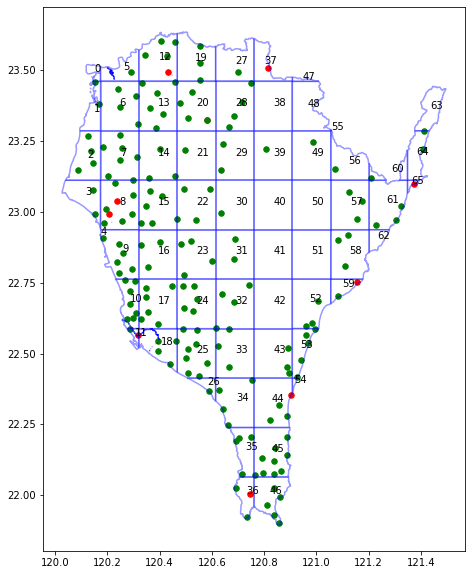

In [3]:
Sta_df = pd.read_csv('WeatherStation.csv')
Sta_gdf = gp.GeoDataFrame(
    Sta_df, geometry=gp.points_from_xy(Sta_df.Longitude, Sta_df.Latitude), crs=taiwan_grid.crs)
MainSta_gdf = Sta_gdf.loc[0:9]
SecSta_gdf = Sta_gdf.loc[9:]

centroid = taiwan_grid.centroid

fig, ax = plt.subplots(figsize=(10, 10))
taiwan_grid.boundary.plot(ax=ax, color='b', alpha=0.4, zorder=3)
SecSta_gdf.plot(ax=ax, marker='o', color='g', markersize=30, zorder=2)
MainSta_gdf.plot(ax=ax, marker='o', color='r', markersize=30, zorder=1)

for i in range(len(taiwan_grid)):
    plt.text(centroid.x[i],centroid.y[i],f"{taiwan_grid.index[i]}", size=10)
plt.show()

print()

In [7]:
# for loop
Sta_df = pd.read_csv('WeatherStation.csv')
Sta_gdf = gp.GeoDataFrame(
    Sta_df, geometry=gp.points_from_xy(Sta_df.Longitude, Sta_df.Latitude), crs=taiwan_grid.crs)
Sta_Data = pd.read_csv('./CODiS/2017-01-01_H01.csv')


Sta_gdf['StnPres'] = Sta_Data['StnPres']
Sta_gdf['Temperature'] = Sta_Data['Temperature']
Sta_gdf['RH'] = Sta_Data['RH']
Sta_gdf['WS'] = Sta_Data['WS']
Sta_gdf['WD'] = Sta_Data['WD']
Sta_gdf['Precp'] = Sta_Data['Precp']



file_list = sorted(os.listdir('./CODiS'))
#print(file_list)

file_name = '2019-01-01_H01.csv'
p = re.compile(r'\d+')
date = p.findall(file_name)

syear, smonth, sday, hour = date
eyear, emonth, eday = syear, smonth, sday
hour = int(hour)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # This is added back by InteractiveShellApp.init_path()


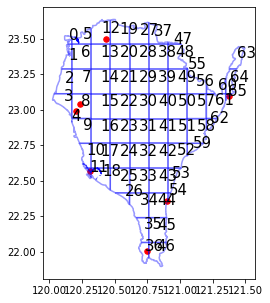

In [5]:
# test
Sta_df = pd.DataFrame(
    {'Station': ['臺南', '永康', '高雄', '嘉義', '大武', '恆春', '成功'],
     'Latitude': [22.9932, 23.0384, 22.5660, 23.4959, 22.3557, 22.0039, 23.0975],
     'Longitude': [120.2048, 120.2367, 120.3157, 120.4329, 120.9038, 120.7463, 121.3734],
     'Altitude': [40.8, 8.1, 2.3, 26.9, 8.1, 22.3, 33.5]})

Sta_gdf = gp.GeoDataFrame(
    Sta_df, geometry=gp.points_from_xy(Sta_df.Longitude, Sta_df.Latitude), crs=taiwan_grid.crs)

centroid = taiwan_grid.centroid

fig, ax = plt.subplots(figsize=(5, 5))
taiwan_grid.boundary.plot(ax=ax, color='b', alpha=0.4, zorder=2)
Sta_gdf.plot(ax=ax, marker='o', color='r', markersize=30, zorder=1)

for i in range(len(taiwan_grid)):
    plt.text(centroid.x[i],centroid.y[i],f"{taiwan_grid.index[i]}", size=15)
plt.show()

Sta_gdf['StnPres'] = [1020.1, 1021.4, 1022.1, 1019.6, 1022.7, 1018.5, 1020.2]
Sta_gdf['Temperature'] = [21.4, 21.7, 22.9, 22.4, 23.0, 23.4, 21.6]
Sta_gdf['RH'] = [68, 68, 65, 65, 63, 63, 71]
Sta_gdf['WS'] = [3.6, 3.8, 2.5, 2.9, 6.5, 9.0, 6.7]
Sta_gdf['WD'] = [330, 340, 310, 20, 30, 40, 20]
Sta_gdf['Precp'] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
#Sta_gdf

In [8]:
# locate the weather station with taiwan_grid
# use a grid value to represent the area
taiwan_grid = gp.read_file("./MapData/taiwan_grid.shp")
taiwan_grid['StnPres'] = 0
taiwan_grid['Temperature'] = 0
taiwan_grid['RH'] = 0
taiwan_grid['WS'] = 0
taiwan_grid['WD'] = 0
taiwan_grid['Precp'] = 0

fields = [[]for i in range(len(taiwan_grid))]

for i in range(len(Sta_gdf)):
    for u in range(len(taiwan_grid)):
        if Sta_gdf.loc[i, 'geometry'].within(taiwan_grid.loc[u, 'geometry']):
            fields[u].append(i)
            #print(f'sta_{sta_gdf.iloc[i]["Station"]} is in taiwan_grid-{u}')
            taiwan_grid.loc[u, 'StnPres'] += Sta_gdf.loc[i, 'StnPres']
            taiwan_grid.loc[u, 'Temperature'] += Sta_gdf.loc[i, 'Temperature']
            taiwan_grid.loc[u, 'RH'] += Sta_gdf.loc[i, 'RH']
            taiwan_grid.loc[u, 'WS'] += Sta_gdf.loc[i, 'WS']
            taiwan_grid.loc[u, 'WD'] += Sta_gdf.loc[i, 'WD']
            taiwan_grid.loc[u, 'Precp'] += Sta_gdf.loc[i, 'Precp']

#print(fields)

for u in range(len(taiwan_grid)):
    count=0
    
    # average value in a grid area 
    if fields[u] != []:
        count = len(fields[u])
        taiwan_grid.loc[u, 'StnPres'] /= count
        taiwan_grid.loc[u, 'Temperature'] /= count
        taiwan_grid.loc[u, 'RH'] /= count
        taiwan_grid.loc[u, 'WS'] /= count
        taiwan_grid.loc[u, 'WD'] /= count
        taiwan_grid.loc[u, 'Precp'] /= count
    
    # if no station is located in the grid, the value is set to nan
    else:
        taiwan_grid.loc[u, 'StnPres'] = np.nan
        taiwan_grid.loc[u, 'Temperature'] = np.nan
        taiwan_grid.loc[u, 'RH'] = np.nan
        taiwan_grid.loc[u, 'WS'] = np.nan
        taiwan_grid.loc[u, 'WD'] = np.nan
        taiwan_grid.loc[u, 'Precp'] = np.nan

#taiwan_grid        

In [9]:
# use the centroid location to represent the grid area's latitude and longtitude
## it is used in the SOLPOS input values
# x: longitude
# y: latitude
centroid = taiwan_grid['geometry'].centroid
taiwan_grid['longitude'] = centroid.x
taiwan_grid['latitude'] = centroid.y
#taiwan_grid

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


In [11]:
taiwan_grid

,FID,geometry,StnPres,Temperature,RH,WS,WD,Precp,longitude,latitude
0,0,"MULTIPOLYGON (((120.17382 23.51379, 120.17382 ...",1019.35000,17.700,97.500,0.75000,135.500,0.0,120.150335,23.494756
1,1,"MULTIPOLYGON (((120.14498 23.46132, 120.17382 ...",1019.90000,18.400,97.000,0.90000,7.000,0.0,120.147728,23.353609
2,2,"POLYGON ((120.09507 23.28673, 120.17382 23.286...",1020.32500,17.800,95.250,1.50000,170.500,0.0,120.122255,23.191780
3,3,"POLYGON ((120.04008 23.11214, 120.17382 23.112...",1020.25000,18.700,98.500,1.10000,14.000,0.0,120.116386,23.059587
4,4,"POLYGON ((120.17382 22.92192, 120.17382 22.916...",1019.51875,18.325,97.125,0.93125,73.875,0.0,120.173517,22.919109
...,...,...,...,...,...,...,...,...,...,...
61,61,"POLYGON ((121.20226 23.11214, 121.26767 23.112...",1004.70000,18.100,87.000,2.55000,23.000,1.1,121.267177,23.031952
62,62,"POLYGON ((121.20226 22.93755, 121.27960 22.937...",1004.70000,18.100,87.000,2.55000,23.000,1.1,121.232383,22.906356
63,63,"POLYGON ((121.43248 23.28673, 121.37729 23.286...",990.80000,18.500,96.000,0.40000,199.000,0.0,121.437580,23.363335
64,64,"POLYGON ((121.37729 23.28673, 121.43248 23.286...",1004.70000,18.100,87.000,2.55000,23.000,1.1,121.383039,23.199599


In [10]:
# knn impute for the missing values at one time for all stations
## StnPres and Temperature are piped to the SOLPOS
## RH and Precp are piped to the precp_FeatMap
## WS and WD are piped to the wind_FeatMap
imputer = KNNImputer(n_neighbors=2, copy=True)
taiwan_grid[['StnPres', 'Temperature', 'RH', 'WS', 'WD', 'Precp', 'longitude', 'latitude']] = \
imputer.fit_transform(taiwan_grid[['StnPres', 'Temperature', 'RH', 'WS', 'WD', 'Precp', 'longitude', 'latitude']])
#taiwan_grid

In [9]:
# SOLPOS
taiwan_grid['AM'] = np.nan
taiwan_grid['CosInc'] = np.nan
taiwan_grid['ETR'] = np.nan
taiwan_grid['Hour'] = np.nan

for i in range(len(taiwan_grid)):
    StaLoc = dict(taiwan_grid.loc[i, ['latitude', 'longitude', 'StnPres', 'Temperature']])
    sol_out = solpos(syear=syear,
                     smonth=smonth,
                     sday=sday,
                     eyear=eyear,
                     emonth=emonth,
                     eday=eday,
                     hour=7,
                     **StaLoc)
    
    taiwan_grid.loc[i, ['AM', 'CosInc', 'ETR']] = sol_out
    
    if sol_out[-1] > 0:   
        taiwan_grid.loc[i, 'Hour'] = 1.0
    else:
        taiwan_grid.loc[i, 'Hour'] = 0.0

In [10]:
taiwan_grid

,FID,geometry,StnPres,Temperature,RH,WS,WD,Precp,longitude,latitude,AM,CosInc,ETR,Hour
0,0,"MULTIPOLYGON (((120.17382 23.51379, 120.17382 ...",1020.175,21.975,66.5,3.3,177.5,0.0,120.150335,23.494756,14.3792,0.0570,80.6374,1.0
1,1,"MULTIPOLYGON (((120.14498 23.46132, 120.17382 ...",1020.175,21.975,66.5,3.3,177.5,0.0,120.147728,23.353609,14.1986,0.0580,82.0862,1.0
2,2,"POLYGON ((120.09507 23.28673, 120.17382 23.286...",1020.175,21.975,66.5,3.3,177.5,0.0,120.122255,23.191780,14.0489,0.0589,83.3128,1.0
3,3,"POLYGON ((120.04008 23.11214, 120.17382 23.112...",1021.425,22.225,66.5,3.1,322.5,0.0,120.116386,23.059587,13.9111,0.0598,84.6058,1.0
4,4,"POLYGON ((120.17382 22.92192, 120.17382 22.916...",1021.425,22.225,66.5,3.1,322.5,0.0,120.173517,22.919109,13.6082,0.0616,87.2108,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,61,"POLYGON ((121.20226 23.11214, 121.26767 23.112...",1021.450,22.300,67.0,6.6,25.0,0.0,121.267177,23.031952,11.6240,0.0758,107.3097,1.0
62,62,"POLYGON ((121.20226 22.93755, 121.27960 22.937...",1021.450,22.300,67.0,6.6,25.0,0.0,121.232383,22.906356,11.5653,0.0763,108.0002,1.0
63,63,"POLYGON ((121.43248 23.28673, 121.37729 23.286...",1019.900,22.000,68.0,4.8,20.0,0.0,121.437580,23.363335,11.6322,0.0756,107.0065,1.0
64,64,"POLYGON ((121.37729 23.28673, 121.43248 23.286...",1021.450,22.300,67.0,6.6,25.0,0.0,121.383039,23.199599,11.5875,0.0761,107.7383,1.0


In [11]:
# normalization and mapping the raw values
## Air Mass -1(sunset) / >0 (sun rise)
## CosInc: -1 to 1
RH_scaler = MinMaxScaler(feature_range=(1, 2), copy=True)
WS_scaler = MinMaxScaler(feature_range=(1, 2), copy=True)
WD_scaler = MinMaxScaler(feature_range=(1, 2), copy=True)
Precp_scaler = MinMaxScaler(feature_range=(1, 2), copy=True)

taiwan_grid['RH'] = RH_scaler.fit_transform(np.array(taiwan_grid['RH']).reshape(-1, 1))
taiwan_grid['WS'] = WS_scaler.fit_transform(np.array(taiwan_grid['WS']).reshape(-1, 1))
taiwan_grid['WD'] = WD_scaler.fit_transform(np.array(taiwan_grid['WD']).reshape(-1, 1))
taiwan_grid['Precp'] = Precp_scaler.fit_transform(np.array(taiwan_grid['Precp']).reshape(-1, 1))

taiwan_grid = taiwan_grid.drop(['longitude', 'latitude'], axis=1)
taiwan_grid

,FID,geometry,StnPres,Temperature,RH,WS,WD,Precp,AM,CosInc,ETR,Hour
0,0,"MULTIPOLYGON (((120.17382 23.51379, 120.17382 ...",1020.175,21.975,1.4375,1.123077,1.500000,1.0,14.3792,0.0570,80.6374,1.0
1,1,"MULTIPOLYGON (((120.14498 23.46132, 120.17382 ...",1020.175,21.975,1.4375,1.123077,1.500000,1.0,14.1986,0.0580,82.0862,1.0
2,2,"POLYGON ((120.09507 23.28673, 120.17382 23.286...",1020.175,21.975,1.4375,1.123077,1.500000,1.0,14.0489,0.0589,83.3128,1.0
3,3,"POLYGON ((120.04008 23.11214, 120.17382 23.112...",1021.425,22.225,1.4375,1.092308,1.960317,1.0,13.9111,0.0598,84.6058,1.0
4,4,"POLYGON ((120.17382 22.92192, 120.17382 22.916...",1021.425,22.225,1.4375,1.092308,1.960317,1.0,13.6082,0.0616,87.2108,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,61,"POLYGON ((121.20226 23.11214, 121.26767 23.112...",1021.450,22.300,1.5000,1.630769,1.015873,1.0,11.6240,0.0758,107.3097,1.0
62,62,"POLYGON ((121.20226 22.93755, 121.27960 22.937...",1021.450,22.300,1.5000,1.630769,1.015873,1.0,11.5653,0.0763,108.0002,1.0
63,63,"POLYGON ((121.43248 23.28673, 121.37729 23.286...",1019.900,22.000,1.6250,1.353846,1.000000,1.0,11.6322,0.0756,107.0065,1.0
64,64,"POLYGON ((121.37729 23.28673, 121.43248 23.286...",1021.450,22.300,1.5000,1.630769,1.015873,1.0,11.5875,0.0761,107.7383,1.0


In [12]:
# set taiwan_offgrid values as 0
# concat with taiwan_grid
taiwan_offgrid['StnPres'] = 0
taiwan_offgrid['Temperature'] = 0
taiwan_offgrid['RH'] = 0
taiwan_offgrid['WS'] = 0
taiwan_offgrid['WD'] = 0
taiwan_offgrid['Precp'] = 0
taiwan_offgrid['AM'] = 0
taiwan_offgrid['CosInc'] = 0
taiwan_offgrid['ETR'] = 0
taiwan_offgrid['Hour'] = 0

codis = pd.concat([taiwan_grid, taiwan_offgrid], ignore_index=True)

assert codis.crs == 'epsg:3824' 
#codis.to_file("solpos.shp")
codis

,FID,geometry,StnPres,Temperature,RH,WS,WD,Precp,AM,CosInc,ETR,Hour
0,0,"MULTIPOLYGON (((120.17382 23.51379, 120.17382 ...",1020.175,21.975,1.4375,1.123077,1.500000,1.0,14.3792,0.0570,80.6374,1.0
1,1,"MULTIPOLYGON (((120.14498 23.46132, 120.17382 ...",1020.175,21.975,1.4375,1.123077,1.500000,1.0,14.1986,0.0580,82.0862,1.0
2,2,"POLYGON ((120.09507 23.28673, 120.17382 23.286...",1020.175,21.975,1.4375,1.123077,1.500000,1.0,14.0489,0.0589,83.3128,1.0
3,3,"POLYGON ((120.04008 23.11214, 120.17382 23.112...",1021.425,22.225,1.4375,1.092308,1.960317,1.0,13.9111,0.0598,84.6058,1.0
4,4,"POLYGON ((120.17382 22.92192, 120.17382 22.916...",1021.425,22.225,1.4375,1.092308,1.960317,1.0,13.6082,0.0616,87.2108,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
133,67,"POLYGON ((121.34918 22.76296, 121.49610 22.762...",0.000,0.000,0.0000,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0
134,68,"POLYGON ((121.34918 22.58837, 121.49610 22.588...",0.000,0.000,0.0000,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0
135,69,"POLYGON ((121.34918 22.41377, 121.49610 22.413...",0.000,0.000,0.0000,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0
136,70,"POLYGON ((121.34918 22.23918, 121.49610 22.239...",0.000,0.000,0.0000,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0


(200, 155)


True

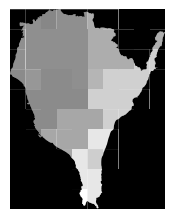

In [13]:
# 100 pixel = 1" DPI
dpi = 100
width_pixel = 200
height_pixel = 350

fig, ax = plt.subplots(figsize=(width_pixel/dpi, height_pixel/dpi), dpi=dpi)
canvas = FigureCanvasAgg(fig)

codis.plot(ax=ax, column='WS', cmap='gray')

ax.set_axis_off()
ax.set_xlim(left=taiwan_offgrid.total_bounds[0], right=taiwan_offgrid.total_bounds[2])
ax.set_ylim(bottom=taiwan_offgrid.total_bounds[1], top=taiwan_offgrid.total_bounds[3])
#print(plt.xlim(), plt.ylim())
#ax.margins(0)
#fig.tight_layout(pad=0)

# Retrieve a view on the renderer buffer
canvas.draw()
buf = canvas.buffer_rgba()
# convert to a NumPy array
X = np.asarray(buf)
assert sum(sum(X[:,:,0] != X[:,:,1])) == 0
assert sum(sum(X[:,:,2] != X[:,:,1])) == 0
X = X[:,:,0]
width_mean = X.mean(axis=0)
height_mean = X.mean(axis=1)

width_ind = np.arange(X.shape[-1])
height_ind = np.arange(X.shape[0])

left = width_ind[list(width_mean != 255.0)][0]
right = width_ind[list(width_mean != 255.0)][-1]
top = height_ind[list(height_mean != 255.0)][0]
bottom = height_ind[list(height_mean != 255.0)][-1]

img = X[top:bottom+1, left:right+1]
print(img.shape)
# To save it in the same resolution as the screen just use the same dpi
#plt.savefig(f'./FeatMap/codis_{i}.png', dpi=dpi)
cv2.imwrite('test.png', img)

(200, 155)


True

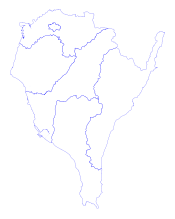

In [14]:
taiwan_contour = gp.read_file("./MapData/taiwan_contour.shp")

# 100 pixel = 1" DPI
dpi = 100
width_pixel = 200
height_pixel = 350

fig, ax = plt.subplots(figsize=(width_pixel/dpi, height_pixel/dpi), dpi=dpi)
canvas = FigureCanvasAgg(fig)

taiwan_contour.boundary.plot(ax=ax, color='b', linewidth=0.1)

ax.set_axis_off()
ax.set_xlim(left=taiwan_offgrid.total_bounds[0], right=taiwan_offgrid.total_bounds[2])
ax.set_ylim(bottom=taiwan_offgrid.total_bounds[1], top=taiwan_offgrid.total_bounds[3])
#print(plt.xlim(), plt.ylim())
#ax.margins(0)
#fig.tight_layout(pad=0)

# Retrieve a view on the renderer buffer
canvas.draw()
buf = canvas.buffer_rgba()
# convert to a NumPy array
X = np.asarray(buf)
X = X[:,:,0]
width_mean = X.mean(axis=0)
height_mean = X.mean(axis=1)

width_ind = np.arange(X.shape[-1])
height_ind = np.arange(X.shape[0])

left = width_ind[list(width_mean != 255.0)][0]
right = width_ind[list(width_mean != 255.0)][-1]
top = height_ind[list(height_mean != 255.0)][0]
bottom = height_ind[list(height_mean != 255.0)][-1]

img = X[top:bottom+1, left:right+1]
print(img.shape)
# To save it in the same resolution as the screen just use the same dpi
#plt.savefig(f'./FeatMap/codis_{i}.png', dpi=dpi)
cv2.imwrite('taiwan_contour.png', img)